# TSF Internship: Data Science & Business Analytics

## Task 1: Prediction Using Supervised Machine Learning

### Name: Varun Sinha

#### Aim: To predict percentage of a student based on the number of study hours.

### Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("http://bit.ly/w-data")

### Statistical Analysis

In [2]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


### Visual Analysis

#### Boxplot to identify the presence of Outliers

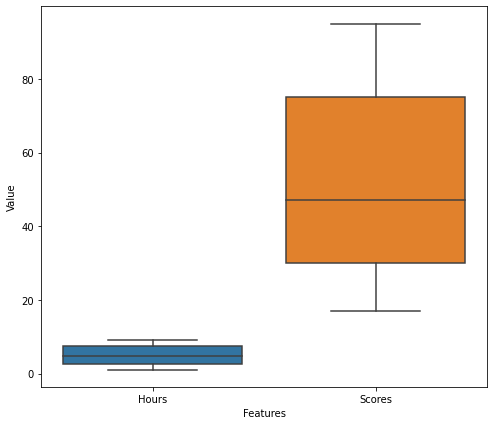

In [7]:
plt.figure(figsize = (8,7))
sns.boxplot(data=df)
plt.xlabel('Features')
plt.ylabel('Value')
plt.show()

#### Scatter plot to observe the relation between dependent and independent variable.

Text(0, 0.5, 'Scores')

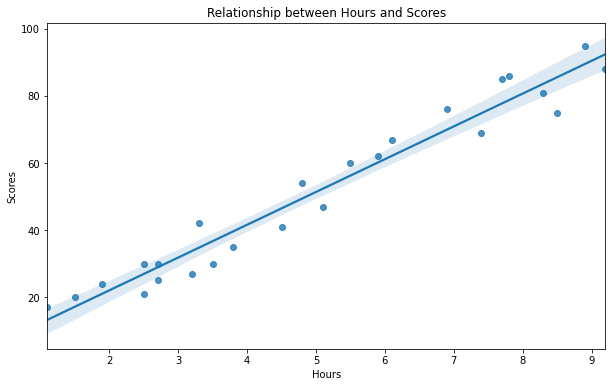

In [8]:
plt.figure(figsize = (10,6))
sns.regplot(data = df, y ='Scores', x='Hours')
plt.title("Relationship between Hours and Scores")
plt.xlabel('Hours')
plt.ylabel('Scores')

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

## Data Preparation

In [9]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

In [10]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.33,random_state=0)

## Building a Simple Linear Regression Model

In [11]:
from sklearn.linear_model import LinearRegression  
model = LinearRegression()  
model.fit(X_train, y_train)

LinearRegression()

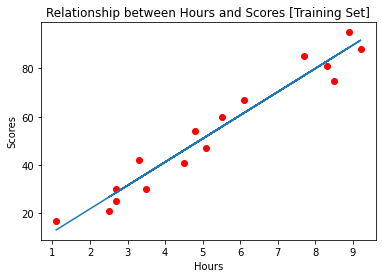

In [12]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, model.predict(X_train))
plt.title("Relationship between Hours and Scores [Training Set]")
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

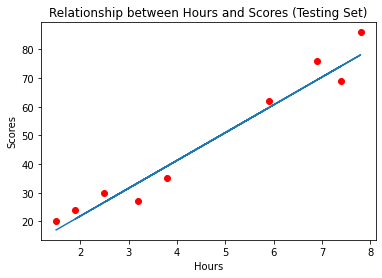

In [13]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, model.predict(X_test))
plt.title("Relationship between Hours and Scores (Testing Set)")
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

## Making Predictions
#### Comparing Actual and Predicted Values

In [14]:
y_pred = model.predict(X_test)
y_pred

array([17.04289179, 33.51695377, 74.21757747, 26.73351648, 59.68164043,
       39.33132858, 20.91914167, 78.09382734, 69.37226512])

In [15]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df1 

,Actual,Predicted
0,20,17.042892
1,27,33.516954
2,69,74.217577
3,30,26.733516
4,62,59.681640
5,35,39.331329
6,24,20.919142
7,86,78.093827
8,76,69.372265


## Model Evaluation

In [16]:
from sklearn.metrics import r2_score,mean_squared_error

mse = mean_squared_error(y_test,y_pred)
rsq = r2_score(y_test,y_pred)
print('mean squared error :',mse)
print('r square :',rsq)

mean squared error : 25.463280738222547
r square : 0.955570080138813


In [17]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.691397441397438


## Intercept and Coefficient of Regression Line

In [18]:
print('Intercept of the model:',model.intercept_)
print('Coefficient of the line:',model.coef_)

Intercept of the model: 2.5069547569547623
Coefficient of the line: [9.69062469]


## Predicting Score when a student studies for 9.25 hours/day?

In [19]:
y_pred1 = model.predict([[9.25]])
y_pred1
print("No of Hours =", 9.25)
print("Predicted Score = {}".format(y_pred1))

No of Hours = 9.25
Predicted Score = [92.14523315]
